Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

## Import Required Libraries:

In [221]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
df = pd.read_csv(r"C:\Users\Tharun\mlstuff\Wafer_Fault_Prediction\wafer_23012020_041211.csv")
print(df.shape)
df.head()

(100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [223]:
# Train-Test Split
from sklearn.model_selection import train_test_split

wafers_train,wafers_test = train_test_split(df,test_size=0.2,random_state=42)

In [224]:
wafers_train.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


Insights:

It looks like we have many outliers in many columns and we need to standardize the data

In [225]:
wafers_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [226]:
wafers_train.isnull().sum()

Unnamed: 0    0
Sensor-1      1
Sensor-2      0
Sensor-3      2
Sensor-4      2
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [227]:
wafers_train['Good/Bad'].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

In [228]:
df.shape

(100, 592)

Insights: The target column is heavily imbalanced we need resampling


## Analyze Missing Data

In [229]:
wafers_train['Good/Bad'].isna().sum()

0

In [230]:
wafers_train

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [231]:
wafers_train.isna().sum().sum()

1822

There are 1822 missing values in wafers_train

In [232]:
df.isna().sum().sum()

2306

There are 2306 missing values in total (train and test data)

Checking missing values in dependent columns

In [233]:
wafers_train.shape[0]

80

In [234]:
(wafers_train.shape[1] - 1)

591

In [235]:
missing_percentage=wafers_train.isna().sum().sum() / (wafers_train.shape[0] * (wafers_train.shape[1]-1)) * 100
missing_percentage

3.8536379018612523

Almost 4% of the data is missing in the dependent columns

## Lets visualize the distribution of first 50 sensors

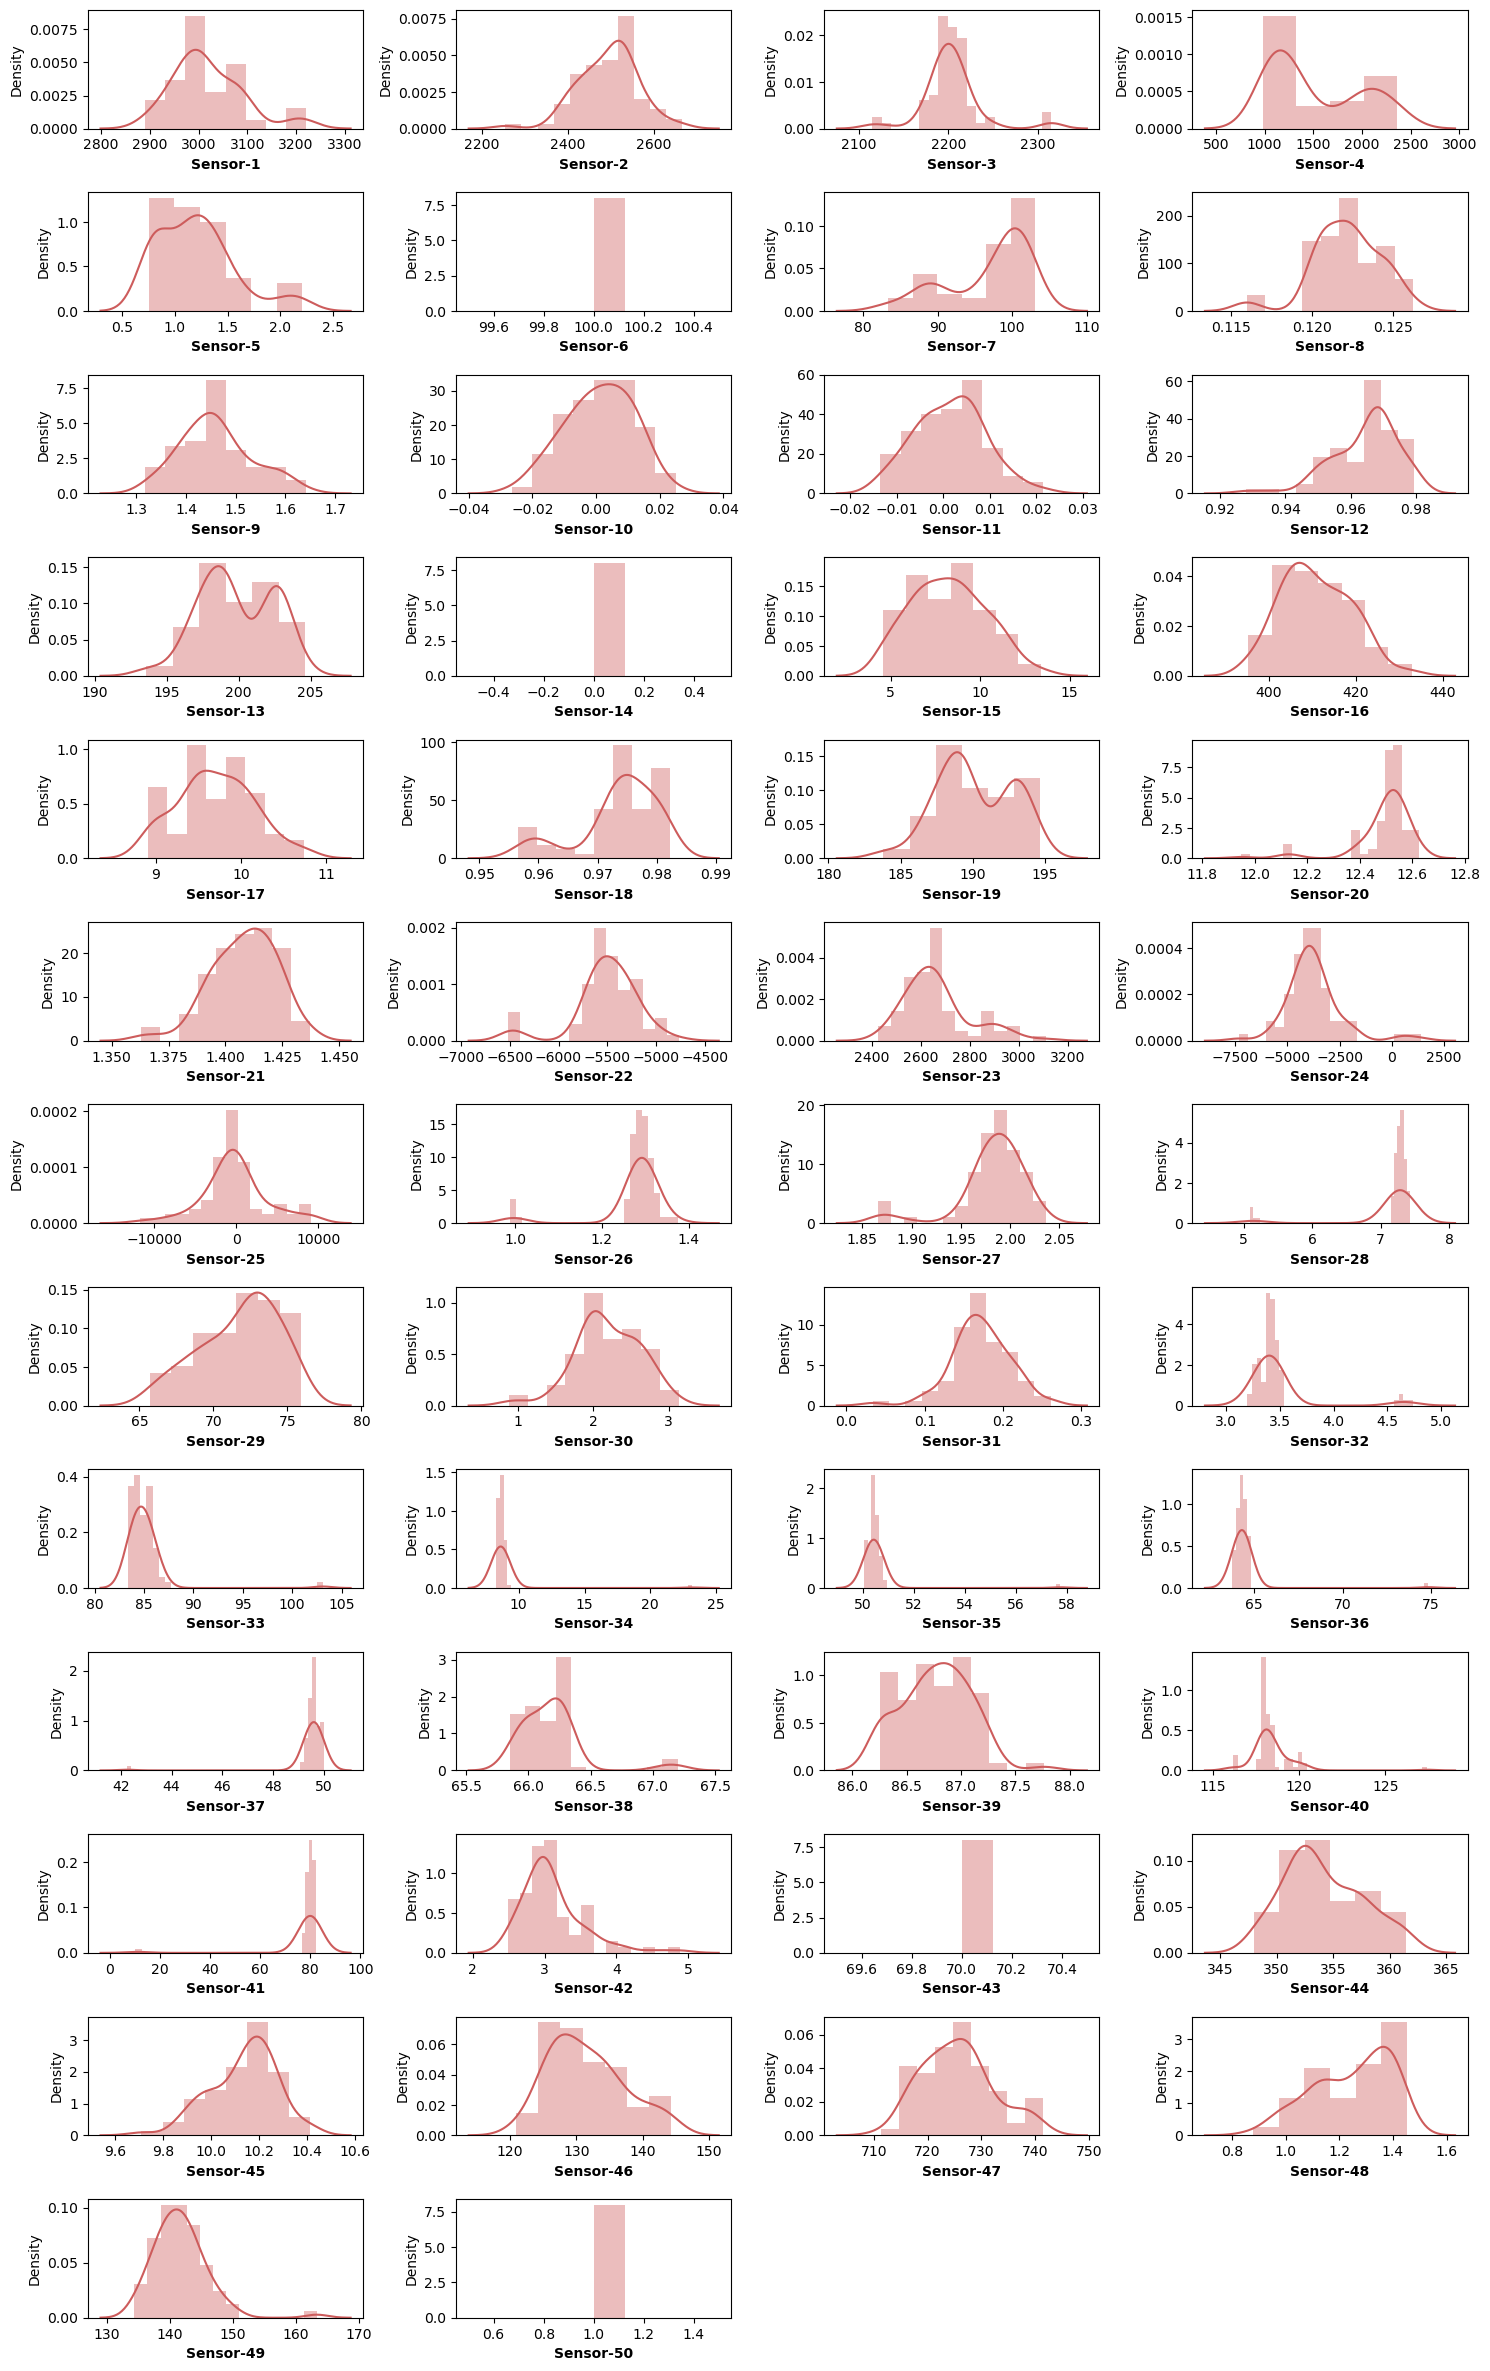

In [236]:
plt.figure(figsize=(15,100))

for i,col in enumerate(wafers_train.columns[1:51]):
    plt.subplot(55,4,i+1)
    sns.distplot(x=wafers_train[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

## Lets visualize the distribution of random 50 sensors

In [237]:
rand  = np.random.randint(1,51,size=50)
rand

array([30, 16, 21, 12, 15, 49, 36, 22,  5, 44,  8, 20, 12, 38, 17, 31, 37,
       39, 12, 11, 23, 45,  4, 28, 19, 38, 14, 47, 50, 25, 15,  4, 44, 13,
       45, 13, 11, 41, 28, 41,  7, 33, 45, 41, 10, 24, 50, 11, 21, 38])

In [238]:
rand_50_idx = []
for i in range(50):
    if i not in rand_50_idx:
        rand_50_idx.append(np.random.randint(1,591))


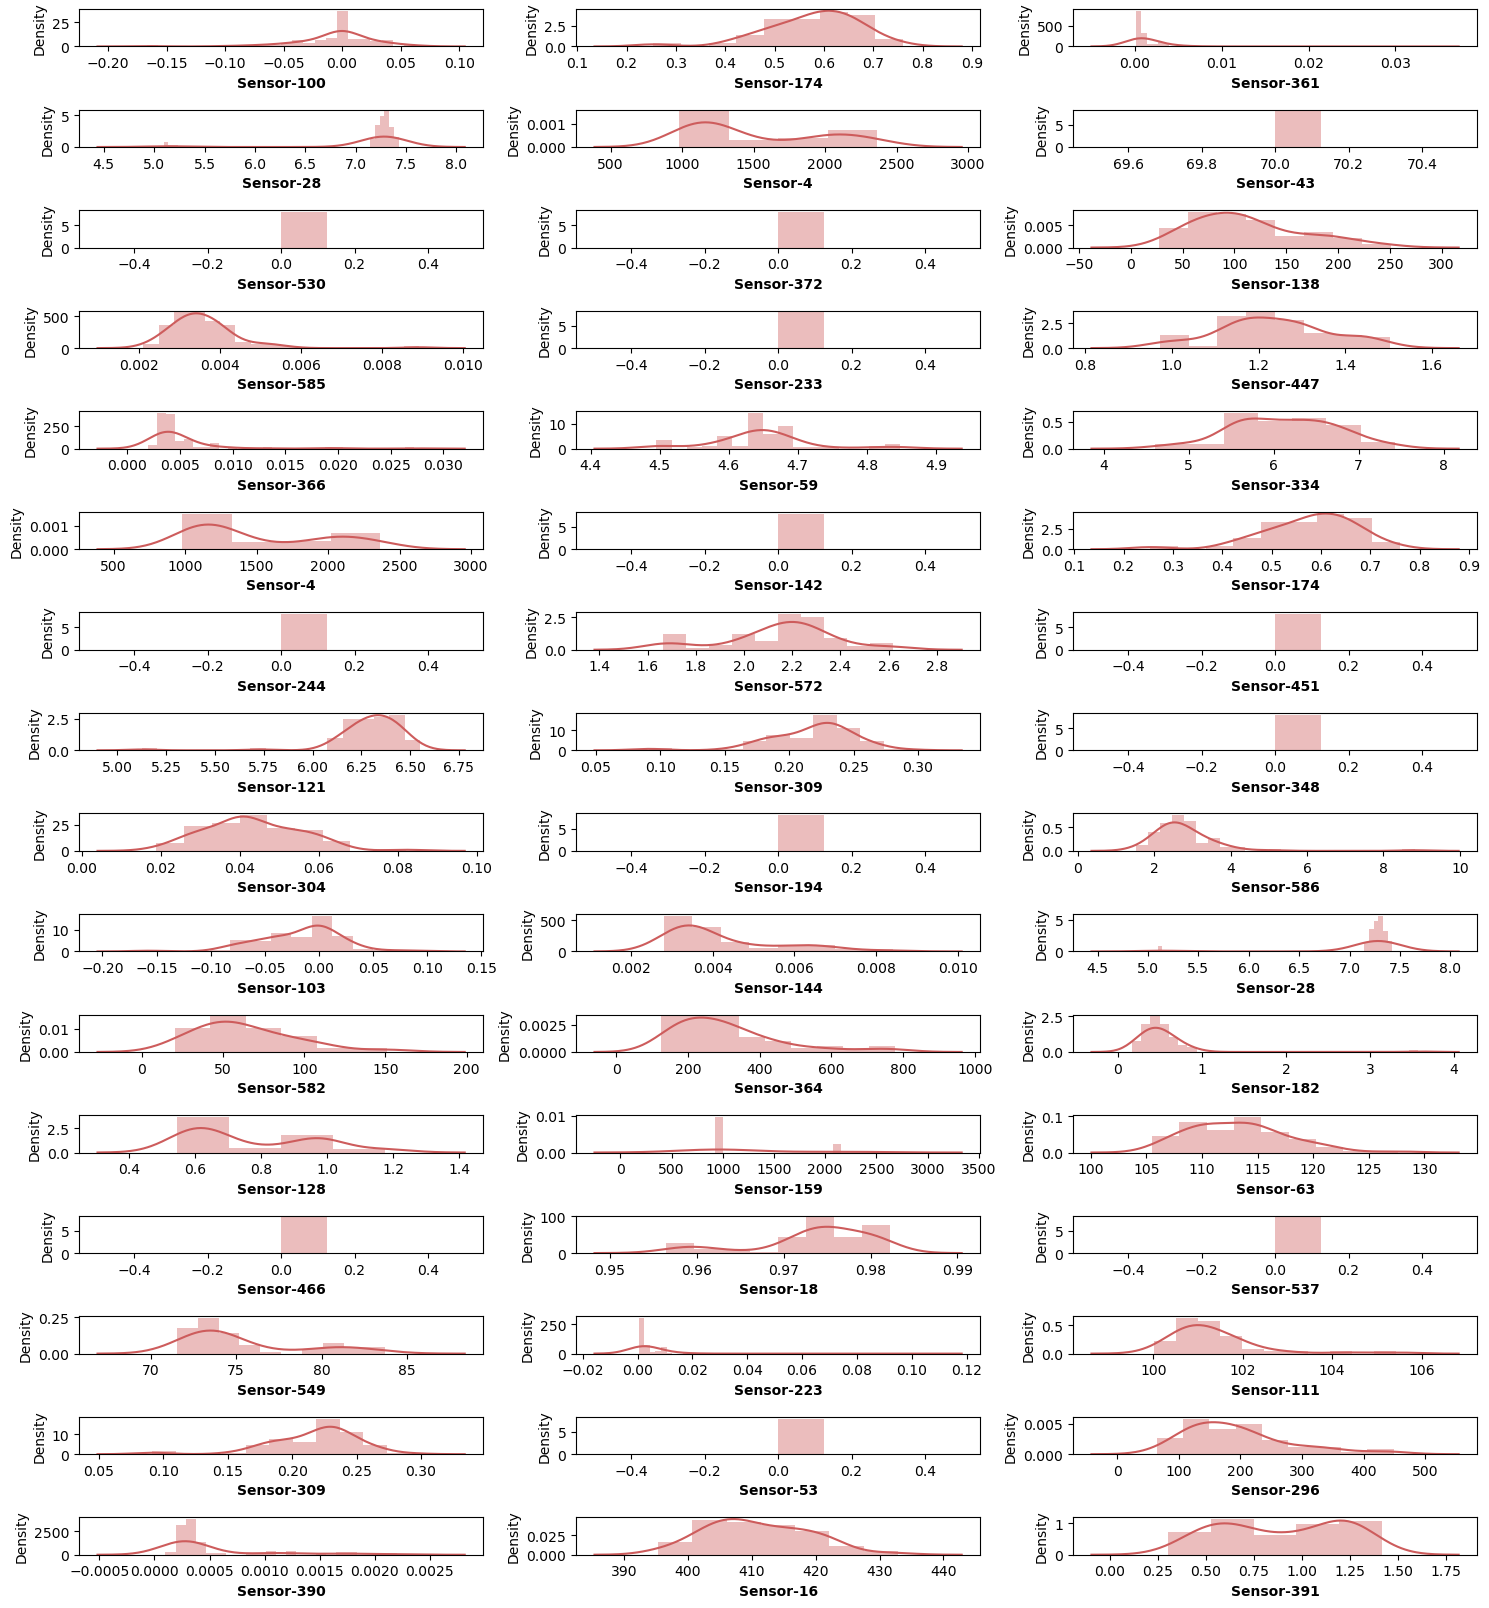

In [239]:
plt.figure(figsize=(15,60))
for i,col in enumerate(wafers_train.columns[rand_50_idx]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers_train[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

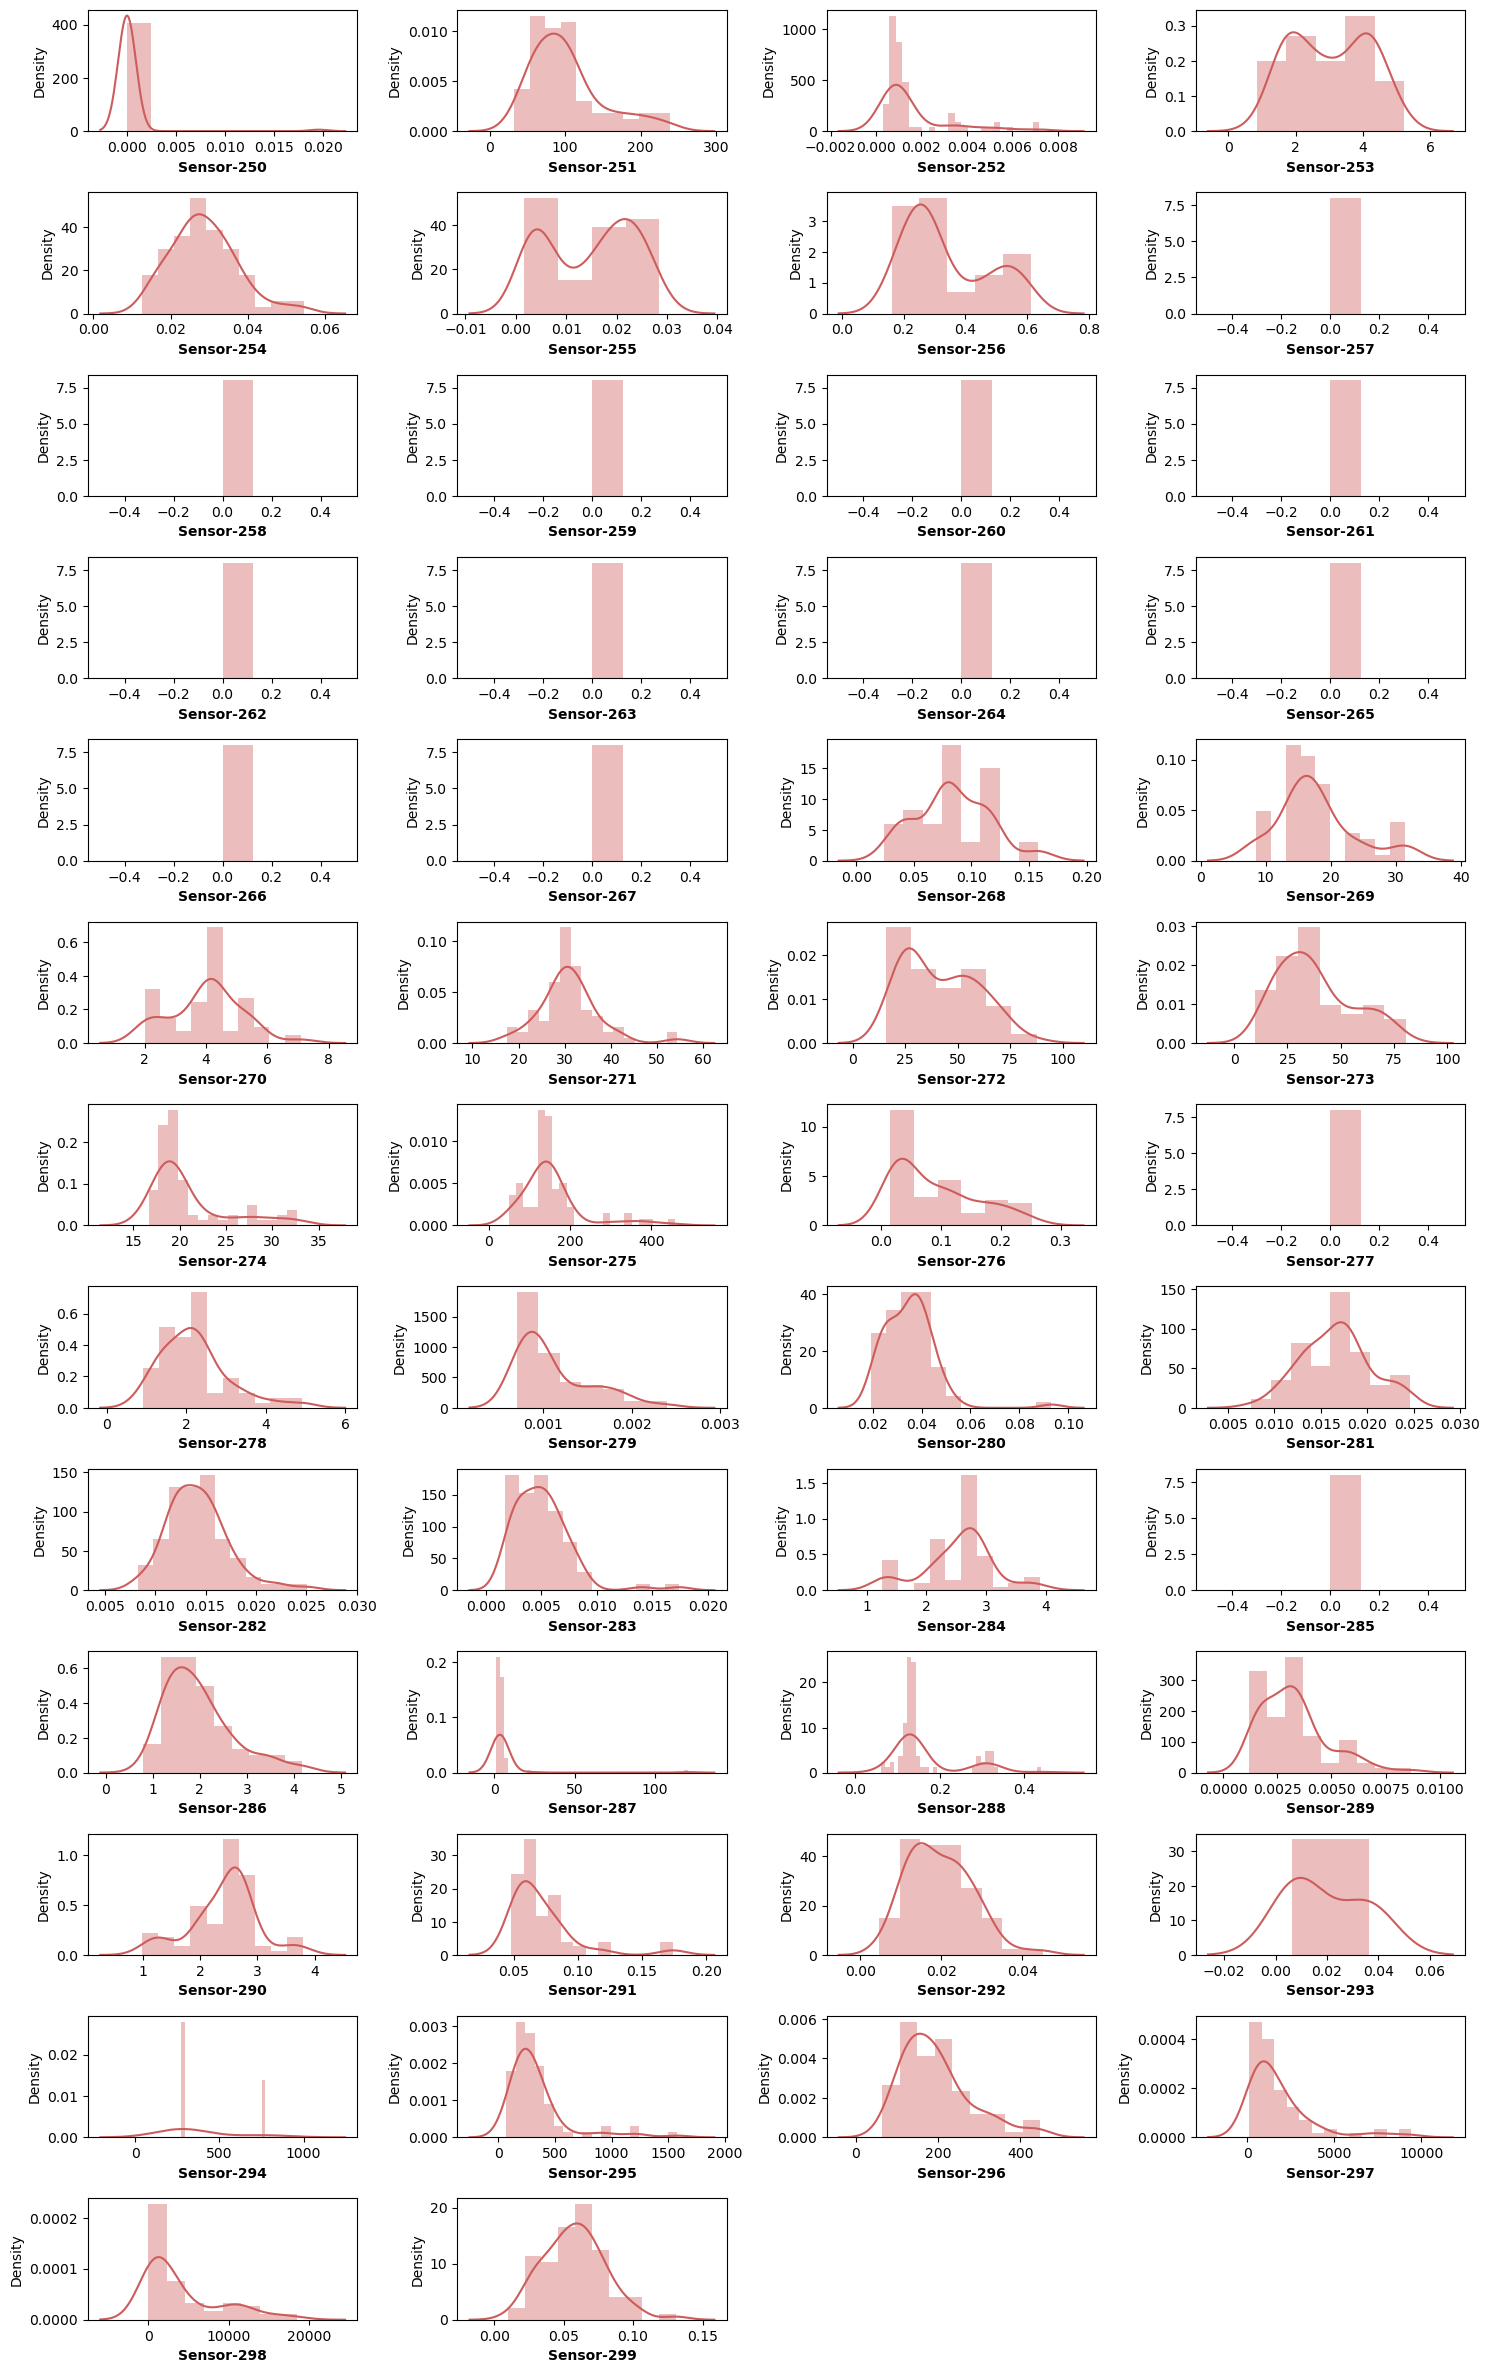

In [240]:
plt.figure(figsize=(15,100))

for i,col in enumerate(wafers_train.columns[250:300]):
    plt.subplot(55,4,i+1)
    sns.distplot(x=wafers_train[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [241]:
wafers_train[wafers_train.columns[158]]

55       NaN
88       NaN
26       NaN
42       NaN
69       NaN
       ...  
60       NaN
71       NaN
14       NaN
92       NaN
51    0.0308
Name: Sensor-158, Length: 80, dtype: float64

In [242]:
wafers_train[wafers_train.columns[6]]

55    100.0
88    100.0
26    100.0
42    100.0
69    100.0
      ...  
60    100.0
71    100.0
14    100.0
92    100.0
51    100.0
Name: Sensor-6, Length: 80, dtype: float64

## Checking columns with zero standard deviation

In [243]:

def get_columns_with_zero_std(df:pd.DataFrame):
    cols_to_drop=[]
    num_cols = [col for col in df.columns if df[col].dtype != 'O'] 
    for cols in num_cols:
        if df[cols].std() == 0:
            cols_to_drop.append(cols)
    return cols_to_drop

In [244]:
cols_to_drop1=get_columns_with_zero_std(df=wafers_train)
len(cols_to_drop1)

122

## Checking columns with missing values more than threshold values 

In [245]:
def get_redundant_columns(df:pd.DataFrame,missing_threshold=0.7):
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_threshold].index)
    return cols_to_drop

In [246]:
cols_to_drop2=get_redundant_columns(df=wafers_train)
cols_to_drop2

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [247]:
cols_to_drop = cols_to_drop1 + cols_to_drop2
len(cols_to_drop)

126

In [248]:
X = wafers_train.drop(cols_to_drop + ["Good/Bad"], axis=1)
y = wafers_train[["Good/Bad"]]


In [249]:
X.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,0.0056,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,0.0020,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547


In [250]:
y

,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1
...,...
60,-1
71,-1
14,-1
92,-1


In [251]:
y.value_counts()

Good/Bad
-1          74
 1           6
Name: count, dtype: int64

## Data Transformation

In [252]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps = [('Imputer',imputer),('Scaling',RobustScaler())]
)

preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaling', RobustScaler())])

In [253]:
X.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,...,NaN,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,...,NaN,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,...,0.0056,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,...,NaN,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,...,0.0020,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547


In [254]:
X.isna().sum().sum()

1481

In [255]:
X=X.drop("Unnamed: 0",axis=1)
X.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
55,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,-0.0066,...,NaN,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034
88,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,0.0025,...,NaN,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,0.0056,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018
69,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,0.0037,...,0.0020,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547


## Transform Wafers  features

In [256]:
X_transforms = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set: ", X_transforms.shape)
X_transforms

Shape of transformed features set:  (80, 464)


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.08510638,
         0.        ,  0.75955556],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.56382979,
        -0.51612903, -0.52610857],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.24468085,
         0.58064516, -0.08775867],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.04255319,
         0.12903226, -0.17805529],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.19148936,
         0.29032258,  0.28421459],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.08510638,
        -0.16129032, -0.20782888]])

In [257]:
pd.DataFrame(X_transforms)

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
0,-0.027812,0.373952,-0.428921,1.022738,-0.014076,-1.375714,1.168317,1.400958,0.088136,-0.887781,...,-0.431818,-0.914150,-1.292818,-0.478261,-0.121212,-0.417537,-0.596491,0.085106,0.000000,0.759556
1,2.504310,-1.386446,-0.479865,-0.310192,-0.570786,0.476912,-0.534653,0.267117,-0.271186,0.019950,...,-0.477273,-0.198765,-1.204420,-0.188406,-0.121212,-0.131350,0.435088,-0.563830,-0.516129,-0.526109
2,-0.602047,0.281103,-0.496852,0.006758,0.347872,0.244190,0.495050,1.207101,-0.318644,1.117207,...,0.840909,-0.068827,0.674033,1.405797,1.333333,1.381872,0.477193,0.244681,0.580645,-0.087759
3,-0.253539,-0.690263,-0.057738,-0.082963,0.467372,0.016042,-0.019802,0.025923,0.861017,-0.867830,...,-0.068182,-0.492923,-0.033149,0.623188,0.484848,0.640176,-0.708772,1.393617,1.645161,2.754960
4,0.623036,0.276118,-0.374576,-0.236166,-0.669412,0.026947,0.178218,0.494787,-0.074576,0.139651,...,-0.795455,-1.195685,-0.453039,1.202899,0.727273,1.236472,0.000000,-0.819149,-0.580645,-0.578269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.772611,1.741143,0.001454,-0.301040,0.418921,0.157070,-0.811881,0.014652,0.230508,-0.708229,...,0.250000,0.766773,-0.475138,0.275362,0.606061,0.299661,-0.673684,0.000000,0.032258,0.813679
76,0.451204,0.536968,-0.374576,-0.236166,-0.669412,0.026947,0.178218,-0.783319,-0.108475,-0.728180,...,0.128788,-0.180775,-0.121547,0.043478,0.242424,0.069385,0.000000,-0.819149,-0.580645,-0.578269
77,-0.032233,0.217791,1.035904,-0.006758,0.433667,0.296794,-0.534653,0.735982,-1.016949,0.468828,...,0.204545,-0.276267,-0.784530,0.362319,0.363636,0.408891,0.421053,0.042553,0.129032,-0.178055
78,0.033963,0.874591,0.535175,0.875736,1.544023,-1.666080,0.415842,-0.082277,-0.440678,-0.299252,...,0.371212,0.630942,-0.165746,1.231884,0.848485,1.245839,-0.161404,0.191489,0.290323,0.284215


In [264]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass


@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e

In [266]:
## Cluster `Wafer` instances

cluster_wafers = ClusterDataInstances(X=X_transforms, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 7157126.728067337
WCSS for n_clusters=2: 2060284.449142073
WCSS for n_clusters=3: 1075205.8026712302
WCSS for n_clusters=4: 524733.9914493755
WCSS for n_clusters=5: 313431.52121901966
WCSS for n_clusters=6: 265239.99017820484
WCSS for n_clusters=7: 217101.65665487642
WCSS for n_clusters=8: 175578.771103086
WCSS for n_clusters=9: 143007.3960137672
WCSS for n_clusters=10: 108681.61725354884
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         0.75955556,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.51612903,
        -0.52610857,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.58064516,
        -0.08775867,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.29032258,
         0.28421459,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.16129032,
        -0.20782888,  1.        ]])

In [267]:
## Clusters

np.unique(X_clus[:, -1])

array([0., 1., 2.])

In [268]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(17, 466)

In [269]:
## Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(62, 466)

In [270]:
## Cluster_3 data

wafers_clus[wafers_clus[:, -2] == 2].shape

(1, 466)

In [281]:
from imblearn.combine import SMOTETomek

X, y = X_transforms, y
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X, y)

In [282]:
X_res.shape

(148, 464)

In [283]:
y_res.shape

(148, 1)

In [284]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (80, 465)
After resampling, Shape of training instances:  (148, 465)


In [285]:
print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 148, 1: 148


Insights:
Now the target column in train data is balanced

In [286]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((98, 464), (98, 1))
test set: ((50, 464), (50, 1))


In [ ]:
# fetch only features that were used in training
X_test, y_test = wafers_test[preprocessing_pipeline.feature_names_in_], wafers_test.iloc[:, -1]

## Transform the Test features
X_test_trans = preprocessing_pipeline.transform(X_test)
print(X_test_trans.shape, y_test.shape)

## Cluster the test features
y_test_kmeans = clusterer.predict(X_test_trans)

## Configure the test array
test_arr = np.c_[X_test_trans, y_test, y_test_kmeans]
np.unique(y_test_kmeans)

### Model Selection and Training:

In [293]:
# Prepared training and test sets

X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(98, 464) (98, 1)
(50, 464) (50, 1)


In [306]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)

In [307]:
## A function to display Scores

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

### Evaluating `SVC (kernel='linear')` using cross-validation:

In [308]:
## SVC Scores

svc_scores = cross_val_score(svc_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [309]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [310]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc

0.94

### Evaluating `SVC (kernel='rbf')` using cross-validation:

In [311]:
## SVC rbf Scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [312]:
display_scores(svc_rbf_scores)

Scores:  [1.   0.84 0.92 0.96 1.   1.   0.96 1.   1.   1.  ]
Mean:  0.968
Standard Deviation:  0.04995998398718716


In [313]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test_prep, svc_rbf_preds)
svc_rbf_auc

0.6799999999999999

### Evaluating `RandomForestClassifier` using cross-validation:

In [314]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [315]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [316]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

0.98